# 1.0 Introduction

***prepared by [Hui Hui](https://www.kaggle.com/leowhuihui)***

This analysis is to focus on the Bellabeat, a high-tech manufacturer of health-focused products for women, analyze the smart device usage data to gain insight and provide recommendations for Bellabeat's new marketing strategies.


## 1.1 Objectives
The objectives are to explore how consumers are using smart devices with the data available, and provide recommendations on new marketing strategy for Bellabeat.
The visualizations that are of interest listed down below with headers referring to these visualization respectively.
 1. Distribution Records of Daily Activity Across a Week
 2. Distribution Records of Sleep Minute Across a Week
 3. Distribution of Active Minutes in Percentage
 4. Sedentary Minutes of the Week
 5. Steps Count of the Week
 6. Daily Hourly Steps Count
 7. Total Steps vs Calories
 8. Total Steps vs Active Minutes
 9. Calories vs Active Minutes
 10. Total Minutes Asleep vs Calories

## 1.2 About the Company

***Bellabeat***, a high-tech company that manufactures health-focused smart products that informs and inspires women around the world. It was founded in 2013, which has 5 focus products: bellabeat app, leaf, time, spring and bellabeat membership. Bellabeat has grown rapidly and quickly positioned as a tech-driven wellness company for women.
Eventhough Bellabeat has successfully grown as a top market leader, Bellabeat is still seeking for more opportunities to grow and becoming larger player in the smart device market. 
Our team have been asked to analyze smart device data to gain insight into how consumers are using their smart devices. We will use these insights and provide recommendations for marketing strategy for the company.

## 1.3 Key Business Questions
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?


# 2.0 Data Analysis Process

## 2.1 Step 1: Ask
- Business task : 
  Analyze smart device usage data and conclude recommendations for Bellabeat new marketing strategies. 
- Key stakeholders : 
  - Primary stakeholders : Urška Sršen and Sando Mur, founders of Bellabeat.
  - Secondary stakeholders : Bellabeat marketing analytics team.

## 2.2 Step 2: Prepare
- Define data organization, sorting and filtering data.


### 2.2.1 Data Description
- Data source:
    - FitBit Fitness Tracker Data from Kaggle user Möbius :  [Click here for dataset](https://www.kaggle.com/datasets/arashnic/fitbit) 
    - This dataset is a public data collected from FitBit users via a distributed survey on Amazon Mechanical Turk.
 - File type: The dataset has 11 CSV files
 - Data size: 33 samples
 - Data format: Long data
 - Data duration: 03.12.2016 - 05.12.2016
 - Data license: CC0: Public Domain
 

### 2.2.2 Data ROCCC
 - **Reliability**: The data was collected from a distributed survey via Amazon Mechanical Turk with contributions of 33 FitBit users who submitted their personal tracker data.
 - **Original**: The data was collected from a distributed survey via Amazon Mechanical Turk with contributions of 33 FitBit users who submitted their personal tracker data.
 - **Comprehensive**: The data tracks user activity included active time, sedentary time, sleep time, calories, steps count and others. There is many user activities but with small sample size and most data is recorded during certain days of week.
 - **Current**: The data duration was collected on 03.12.2016 to 05.12.2016 which is not current. The users habit may be different for current.
 - **Cited**: Unknown.

### 2.2.3 Preparing Data
Loading library and datasets for further data processing.


In [37]:
# Load Packages
library(tidyverse)

In [38]:
# Import Datasets 
daily_activity <- read.csv("/kaggle/input/bellabeat-dataset-2/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_intensities <- read.csv("/kaggle/input/bellabeat-dataset-2/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_calories <- read.csv("/kaggle/input/bellabeat-dataset-2/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_steps <- read.csv("/kaggle/input/bellabeat-dataset-2/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
sleep_day <- read.csv("/kaggle/input/bellabeat-dataset-2/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log <- read.csv("/kaggle/input/bellabeat-dataset-2/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

In [39]:
# Preview Datasets
head(daily_activity)
head(daily_intensities)
head(daily_calories)
head(daily_steps)
head(sleep_day)
head(weight_log)

Id         ActivityDate TotalSteps TotalDistance TrackerDistance
1 1503960366 4/12/2016    13162      8.50          8.50           
2 1503960366 4/13/2016    10735      6.97          6.97           
3 1503960366 4/14/2016    10460      6.74          6.74           
4 1503960366 4/15/2016     9762      6.28          6.28           
5 1503960366 4/16/2016    12669      8.16          8.16           
6 1503960366 4/17/2016     9705      6.48          6.48           
  LoggedActivitiesDistance VeryActiveDistance ModeratelyActiveDistance
1 0                        1.88               0.55                    
2 0                        1.57               0.69                    
3 0                        2.44               0.40                    
4 0                        2.14               1.26                    
5 0                        2.71               0.41                    
6 0                        3.19               0.78                    
  LightActiveDistance SedentaryActiveDistance VeryActiveMinutes
1 6.06                0                       25               
2 4.71                0                       21               
3 3.91                0                       30               
4 2.83                0                       29               
5 5.04                0                       36               
6 2.51                0                       38               
  FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes Calories
1 13                  328                   728             1985    
2 19                  217                   776             1797    
3 11                  181                  1218             1776    
4 34                  209                   726             1745    
5 10                  221                   773             1863    
6 20                  164                   539             1728

Id         ActivityDay SedentaryMinutes LightlyActiveMinutes
1 1503960366 4/12/2016    728             328                 
2 1503960366 4/13/2016    776             217                 
3 1503960366 4/14/2016   1218             181                 
4 1503960366 4/15/2016    726             209                 
5 1503960366 4/16/2016    773             221                 
6 1503960366 4/17/2016    539             164                 
  FairlyActiveMinutes VeryActiveMinutes SedentaryActiveDistance
1 13                  25                0                      
2 19                  21                0                      
3 11                  30                0                      
4 34                  29                0                      
5 10                  36                0                      
6 20                  38                0                      
  LightActiveDistance ModeratelyActiveDistance VeryActiveDistance
1 6.06                0.55                     1.88              
2 4.71                0.69                     1.57              
3 3.91                0.40                     2.44              
4 2.83                1.26                     2.14              
5 5.04                0.41                     2.71              
6 2.51                0.78                     3.19

Id         ActivityDay Calories
1 1503960366 4/12/2016   1985    
2 1503960366 4/13/2016   1797    
3 1503960366 4/14/2016   1776    
4 1503960366 4/15/2016   1745    
5 1503960366 4/16/2016   1863    
6 1503960366 4/17/2016   1728

Id         ActivityDay StepTotal
1 1503960366 4/12/2016   13162    
2 1503960366 4/13/2016   10735    
3 1503960366 4/14/2016   10460    
4 1503960366 4/15/2016    9762    
5 1503960366 4/16/2016   12669    
6 1503960366 4/17/2016    9705

Id         SleepDay              TotalSleepRecords TotalMinutesAsleep
1 1503960366 4/12/2016 12:00:00 AM 1                 327               
2 1503960366 4/13/2016 12:00:00 AM 2                 384               
3 1503960366 4/15/2016 12:00:00 AM 1                 412               
4 1503960366 4/16/2016 12:00:00 AM 2                 340               
5 1503960366 4/17/2016 12:00:00 AM 1                 700               
6 1503960366 4/19/2016 12:00:00 AM 1                 304               
  TotalTimeInBed
1 346           
2 407           
3 442           
4 367           
5 712           
6 320

Id         Date                  WeightKg WeightPounds Fat BMI  
1 1503960366 5/2/2016 11:59:59 PM   52.6    115.9631     22  22.65
2 1503960366 5/3/2016 11:59:59 PM   52.6    115.9631     NA  22.65
3 1927972279 4/13/2016 1:08:52 AM  133.5    294.3171     NA  47.54
4 2873212765 4/21/2016 11:59:59 PM  56.7    125.0021     NA  21.45
5 2873212765 5/12/2016 11:59:59 PM  57.3    126.3249     NA  21.69
6 4319703577 4/17/2016 11:59:59 PM  72.4    159.6147     25  27.45
  IsManualReport LogId       
1 True           1.462234e+12
2 True           1.462320e+12
3 False          1.460510e+12
4 True           1.461283e+12
5 True           1.463098e+12
6 True           1.460938e+12

In [40]:
# Examine Dataset, Check NA Values, Check Duplications
# Daily Activity Dataset
dim_daily <- dim(daily_activity)
output_dimdaily <- paste("Dimensions of daily_activity:", dim_daily[1], "rows and", dim_daily[2], "columns.")
print(output_dimdaily)

missing_daily <- sum(is.na(daily_activity))
output_misdaily <- paste("Number of missing value:", missing_daily)
print(output_misdaily)

duplicated_daily <- sum(duplicated(daily_activity))
output_dupdaily <- paste("Number of duplicated rows:", duplicated_daily)
print(output_dupdaily)
# Add an empty line
cat("\n")

# Hourly Intensities Dataset
dim_intensities <- dim(daily_intensities)
output_dimintensities <- paste("Dimensions of daily_intensities:", dim_intensities[1], "rows and", dim_intensities[2], "columns.")
print(output_dimintensities)

missing_intensities <- sum(is.na(daily_intensities))
output_misintensities <- paste("Number of missing value:", missing_intensities)
print(output_misintensities)


duplicated_intensities <- sum(duplicated(daily_intensities))
output_dupintensities <- paste("Number of duplicated rows:", duplicated_intensities)
print(output_dupintensities)
# Add an empty line
cat("\n")

# Hourly Calories Dataset
dim_calories <- dim(daily_calories)
output_dimcalories <- paste("Dimensions of daily_calories:", dim_calories[1], "row and", dim_calories[2], "columns.")
print(output_dimcalories)

missing_calories <- sum(is.na(daily_calories))
output_miscalories <- paste("Number of missing value:", missing_calories)
print(output_miscalories)

duplicated_calories <- sum(duplicated(daily_calories))
output_dupcalories <- paste("Number of duplicated rows:", duplicated_calories)
print(output_dupcalories)
# Add an empty line
cat("\n")

# Hourly Steps Dataset
dim_steps <- dim(daily_steps)
output_dimsteps <- paste("Dimensions of daily_steps:", dim_steps[1], "row and", dim_steps[2], "columns.")
print(output_dimsteps)

missing_steps <- sum(is.na(daily_steps))
output_missteps <- paste("Number of missing value:", missing_steps)
print(output_missteps)

duplicated_steps <- sum(duplicated(daily_steps))
output_dupsteps <- paste("Number of duplicated rows:", duplicated_steps)
print(output_dupsteps)
# Add an empty line
cat("\n")

# Minute Sleep Dataset
dim_sleep <- dim(sleep_day)
output_dimsleep <- paste("Dimensions of sleep_day:", dim_sleep[1], "row and", dim_sleep[2], "columns.")
print(output_dimsleep)

missing_sleep <- sum(is.na(sleep_day))
output_missleep <- paste("Number of missing value:", missing_sleep)
print(output_missleep)

duplicated_sleep <- sum(duplicated(sleep_day))
output_dupsleep <- paste("Number of duplicated rows:", duplicated_sleep)
print(output_dupsleep)
# Add an empty line
cat("\n")

# Weight Log Dataset
dim_weight <- dim(weight_log)
output_dimweight <- paste("Dimensions of weight_log:", dim_weight[1], "row and", dim_weight[2], "columns.")
print(output_dimweight)

missing_weight <- sum(is.na(weight_log))
output_misweight <- paste("Number of missing value:", missing_weight)
print(output_misweight)

duplicated_weight <- sum(duplicated(weight_log))
output_dupweight <- paste("Number of duplicated rows:", duplicated_weight)
print(output_dupweight)


# Add an empty line
cat("\n")


[1] "Dimensions of daily_activity: 940 rows and 15 columns."
[1] "Number of missing value: 0"
[1] "Number of duplicated rows: 0"

[1] "Dimensions of daily_intensities: 940 rows and 10 columns."
[1] "Number of missing value: 0"
[1] "Number of duplicated rows: 0"

[1] "Dimensions of daily_calories: 940 row and 3 columns."
[1] "Number of missing value: 0"
[1] "Number of duplicated rows: 0"

[1] "Dimensions of daily_steps: 940 row and 3 columns."
[1] "Number of missing value: 0"
[1] "Number of duplicated rows: 0"

[1] "Dimensions of sleep_day: 413 row and 5 columns."
[1] "Number of missing value: 0"
[1] "Number of duplicated rows: 3"

[1] "Dimensions of weight_log: 67 row and 8 columns."
[1] "Number of missing value: 65"
[1] "Number of duplicated rows: 0"



In [41]:
# Check number of users for each dataframe
sprintf("Number of daily_activity distinct values : %d", n_distinct(daily_activity$Id))
sprintf("Number of daily_intensities distinct values : %d", n_distinct(daily_intensities$Id))
sprintf("Number of daily_calories distinct values : %d", n_distinct(daily_calories$Id))
sprintf("Number of daily_steps distinct values : %d", n_distinct(daily_steps$Id))
sprintf("Number of sleep_day distinct values : %d", n_distinct(sleep_day$Id))
sprintf("Number of weight_log distinct values : %d", n_distinct(weight_log$Id))

[1] "Number of daily_activity distinct values : 33"

[1] "Number of daily_intensities distinct values : 33"

[1] "Number of daily_calories distinct values : 33"

[1] "Number of daily_steps distinct values : 33"

[1] "Number of sleep_day distinct values : 24"

[1] "Number of weight_log distinct values : 8"

### 2.2.4 Observation
1. There is **3** rows of duplication in **sleep_day** dataframe. Duplicated rows to be removed for further analysis.
2. **Weight_log** dataframe has **65** numbers of missing values at column "Fat". This may due to manually record of the "Fat" value.
3. Upon checking of unique user ID, there is **33** user data from **daily activity**, **intensities**, **calories** and **steps** dataframes. Total of **23** user data from **sleep** dataframe, and **11** user data from **weight** dataframe. Some users did not record their data for tracking their sleep activity and weight.
4. The **Date** and **Time** value in all dataframe are formatted as **chr**, this has to be corrected to date and time format.
5. **Column name** are formatted inconsistently. This to be corrected in further steps.


## 2.3 Step 3: Process
- Data processing and transforming data for further analysis.


### 2.3.1 Key Tasks for Data Processing
- Tools : **R language** will be used to clean data, transform data and create data visualization.
- Data cleaning :
 - **Remove duplication** rows in sleep_day dataframe.
 - Correction of **column names** in all necessary dataframe.
 - Correction of **date and time format** in all necessary dataframe.
- Further investigation :
 - Examine and get insight on **missing data** in weight_log dataframe. 
 - Investigate the **daily activity data record distribution** of users within a weekday.
 - Investigate the **sleep data record distribution** of users within a weekday.

In [42]:
# Remove duplication rows in minute_sleep dataframe
sleep_day2 <- sleep_day[!duplicated(sleep_day), ]
duplicated_sleep2 <- sum(duplicated(sleep_day2))
# Recheck for duplication rows
output_dupsleep2 <- paste("Number of duplicated rows after deletion:", duplicated_sleep2)
print(output_dupsleep2)

[1] "Number of duplicated rows after deletion: 0"


In [43]:
# Correct column names
# Daily Activity Dataset
daily_activity_renamed <- daily_activity %>%
    setNames(tolower(names(.)))
# Preview column names
print(colnames(daily_activity_renamed))
# Add an empty line
cat("\n")

# Hourly Intensities Dataset
daily_intensities_renamed <- daily_intensities %>%
    setNames(tolower(names(.))) %>%
    rename(activitydate = activityday)
# Preview column names
print(colnames(daily_intensities_renamed))
# Add an empty line
cat("\n")

# Hourly Calories Dataset
daily_calories_renamed <- daily_calories %>% 
    setNames(tolower(names(.))) %>%
    rename(activitydate = activityday)
# Preview column names
print(colnames(daily_calories_renamed))
# Add an empty line
cat("\n")

# Hourly Steps Dataset
daily_steps_renamed <- daily_steps %>%
    setNames(tolower(names(.))) %>%
    rename(activitydate = activityday)
# Preview column names
print(colnames(daily_steps_renamed))
# Add an empty line
cat("\n")

# Minute Sleep Dataset
sleep_day_renamed <- sleep_day %>%
    setNames(tolower(names(.))) %>%
    rename(activitydate = sleepday)
# Preview column names
print(colnames(sleep_day_renamed))
# Add an empty line
cat("\n")

# Weight Log Dataset
weight_log_renamed <- weight_log %>%
    setNames(tolower(names(.))) %>%
    rename(activitydate = date)
# Preview column names
print(colnames(weight_log_renamed))
# Add an empty line
cat("\n")

 [1] "id"                       "activitydate"            
 [3] "totalsteps"               "totaldistance"           
 [5] "trackerdistance"          "loggedactivitiesdistance"
 [7] "veryactivedistance"       "moderatelyactivedistance"
 [9] "lightactivedistance"      "sedentaryactivedistance" 
[11] "veryactiveminutes"        "fairlyactiveminutes"     
[13] "lightlyactiveminutes"     "sedentaryminutes"        
[15] "calories"                

 [1] "id"                       "activitydate"            
 [3] "sedentaryminutes"         "lightlyactiveminutes"    
 [5] "fairlyactiveminutes"      "veryactiveminutes"       
 [7] "sedentaryactivedistance"  "lightactivedistance"     
 [9] "moderatelyactivedistance" "veryactivedistance"      

[1] "id"           "activitydate" "calories"    

[1] "id"           "activitydate" "steptotal"   

[1] "id"                 "activitydate"       "totalsleeprecords" 
[4] "totalminutesasleep" "totaltimeinbed"    

[1] "id"             "activitydate"   "weigh

In [44]:
# Correct date and time format
# Daily Activity Dataset
dailyactivity_new <- daily_activity_renamed %>%
  mutate(activitydate = as.Date(activitydate, format = "%m/%d/%Y"))
str(dailyactivity_new) # check the results
# Add an empty line
cat("\n")

# Hourly Intensities Dataset
dailyintensities_new <- daily_intensities_renamed %>%
    mutate(activitydate = as.Date(activitydate, format = "%m/%d/%Y"))
str(dailyintensities_new) # check the results
# Add an empty line
cat("\n")

# Hourly Calories Dataset
dailycalories_new <- daily_calories_renamed %>% 
    mutate(activitydate = as.Date(activitydate, format = "%m/%d/%Y"))
str(dailycalories_new) # check the results
# Add an empty line
cat("\n")

# Hourly Steps Dataset
dailysteps_new <- daily_steps_renamed %>%
    mutate(activitydate = as.Date(activitydate, format = "%m/%d/%Y"))
str(dailysteps_new) # check the results
# Add an empty line
cat("\n")

# Minute Sleep Dataset
sleepday_new <- sleep_day_renamed %>%
    mutate(activitydate = as.Date(activitydate, format = "%m/%d/%Y"))
str(sleepday_new) # check the results
# Add an empty line
cat("\n")

# Weight Log Dataset
weightlog_new <- weight_log_renamed %>%
    mutate(activitydate = as.Date(activitydate, format = "%m/%d/%Y"))
str(weightlog_new) # check the results
# Add an empty line
cat("\n")

'data.frame':	940 obs. of  15 variables:
 $ id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ activitydate            : Date, format: "2016-04-12" "2016-04-13" ...
 $ totalsteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ totaldistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ trackerdistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ loggedactivitiesdistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ veryactivedistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ moderatelyactivedistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ lightactivedistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ sedentaryactivedistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ veryactiveminutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ fairlyactiveminutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ lightlyactiveminutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ sedentaryminutes        : int  728 776 1218 726 773 539 1149 775 818 

In [45]:
# Examine and get insight on missing data in weight_log dataframe.
# Filter only the manual report of weight group by id
weightlog_new %>% 
  filter(ismanualreport == "True") %>% 
  group_by(id) %>% 
  summarise("Manual Weight Report"=n()) %>%
  n_distinct(weightlog_new$Id)

[1] 5

In [46]:
# Investigate the daily activity data record distribution of users within a weekday.
dailyactivity_new <- dailyactivity_new %>% 
    mutate( Weekday = weekdays(as.Date(activitydate, "%Y/%m/%d")))

# Preview the daily_activity dataframe after adding weekday column.
head(dailyactivity_new)
# Now the day of the week shown in the last column.

id         activitydate totalsteps totaldistance trackerdistance
1 1503960366 2016-04-12   13162      8.50          8.50           
2 1503960366 2016-04-13   10735      6.97          6.97           
3 1503960366 2016-04-14   10460      6.74          6.74           
4 1503960366 2016-04-15    9762      6.28          6.28           
5 1503960366 2016-04-16   12669      8.16          8.16           
6 1503960366 2016-04-17    9705      6.48          6.48           
  loggedactivitiesdistance veryactivedistance moderatelyactivedistance
1 0                        1.88               0.55                    
2 0                        1.57               0.69                    
3 0                        2.44               0.40                    
4 0                        2.14               1.26                    
5 0                        2.71               0.41                    
6 0                        3.19               0.78                    
  lightactivedistance sedentaryactivedistance veryactiveminutes
1 6.06                0                       25               
2 4.71                0                       21               
3 3.91                0                       30               
4 2.83                0                       29               
5 5.04                0                       36               
6 2.51                0                       38               
  fairlyactiveminutes lightlyactiveminutes sedentaryminutes calories Weekday  
1 13                  328                   728             1985     Tuesday  
2 19                  217                   776             1797     Wednesday
3 11                  181                  1218             1776     Thursday 
4 34                  209                   726             1745     Friday   
5 10                  221                   773             1863     Saturday 
6 20                  164                   539             1728     Sunday

Weekday   count
1 Monday    120  
2 Tuesday   152  
3 Wednesday 150  
4 Thursday  147  
5 Friday    126  
6 Saturday  124  
7 Sunday    121

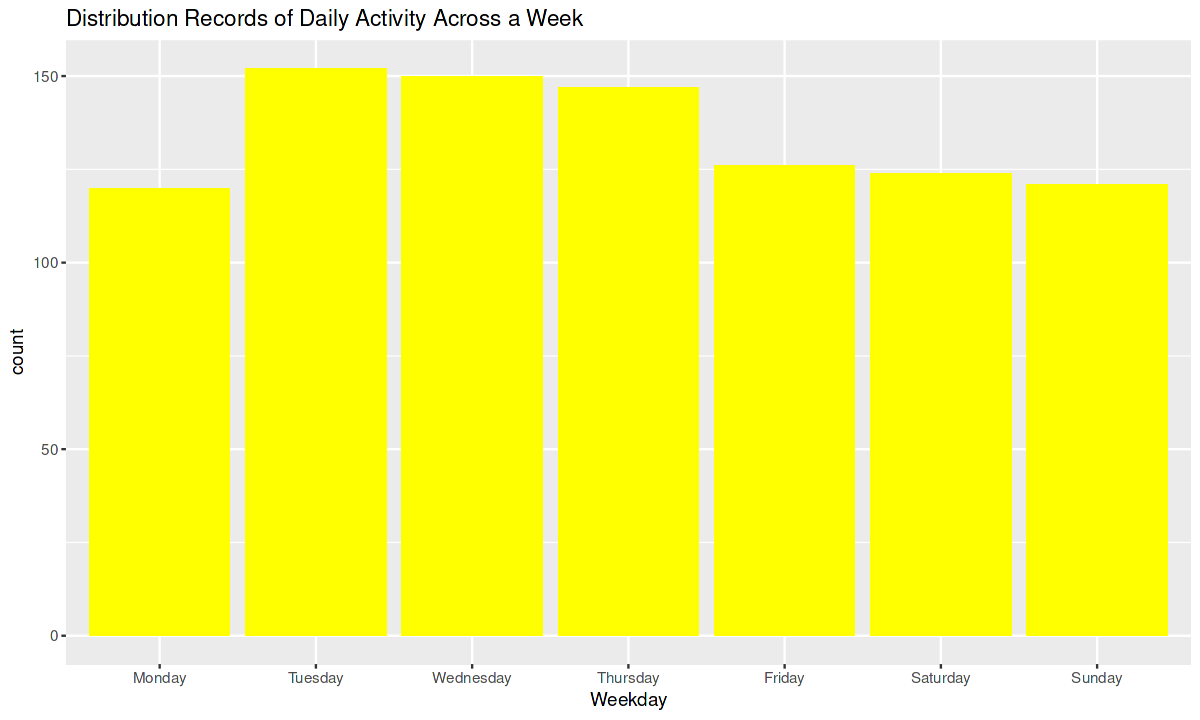

In [47]:
# Get insight of the daily_activity data record distribution with bar chart.
dailyactivity_new$Weekday <- factor(dailyactivity_new$Weekday, 
                                    levels = c("Monday", "Tuesday", "Wednesday", 
                                               "Thursday", "Friday", "Saturday", "Sunday"))

# Set the plot width and height
options(repr.plot.width = 10, repr.plot.height = 6)  # Set the output plot to be wider

ggplot(data=dailyactivity_new, aes(x=Weekday))+
    geom_bar(fill="yellow") +
    ggtitle("Distribution Records of Daily Activity Across a Week")  # Add the title

# Summarize the count of each day in the Weekday column
dailyactivity_new %>%
  count(Weekday, name="count")

In [48]:
# Investigate the minute_sleep data record distribution of users within a weekday.
sleepday_new <- sleepday_new %>% 
    mutate( Weekday = weekdays(as.Date(activitydate, "%Y/%m/%d")))

# Preview the minute_sleep dataframe after adding weekday column.
head(sleepday_new)
# Now the day of the week shown in the last column.

id         activitydate totalsleeprecords totalminutesasleep totaltimeinbed
1 1503960366 2016-04-12   1                 327                346           
2 1503960366 2016-04-13   2                 384                407           
3 1503960366 2016-04-15   1                 412                442           
4 1503960366 2016-04-16   2                 340                367           
5 1503960366 2016-04-17   1                 700                712           
6 1503960366 2016-04-19   1                 304                320           
  Weekday  
1 Tuesday  
2 Wednesday
3 Friday   
4 Saturday 
5 Sunday   
6 Tuesday

Weekday   count
1 Monday    47   
2 Tuesday   65   
3 Wednesday 66   
4 Thursday  65   
5 Friday    57   
6 Saturday  58   
7 Sunday    55

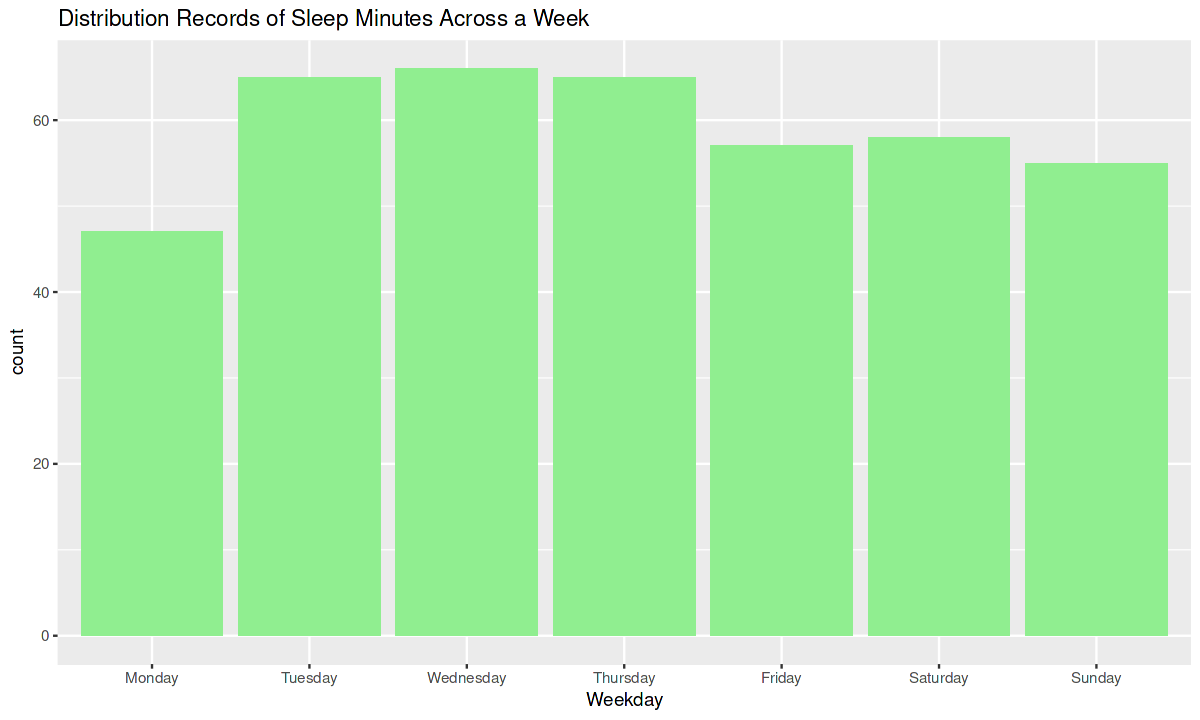

In [49]:
sleepday_new$Weekday <- factor(sleepday_new$Weekday, 
                                    levels = c("Monday", "Tuesday", "Wednesday", 
                                               "Thursday", "Friday", "Saturday", "Sunday"))

# Set the plot width and height
options(repr.plot.width = 10, repr.plot.height = 6)  # Set the output plot to be wider

ggplot(data=sleepday_new, aes(x=Weekday))+
    geom_bar(fill="light green") +
    ggtitle("Distribution Records of Sleep Minutes Across a Week")  # Add the title

# Summarize the count of each day in the Weekday column
sleepday_new %>%
  count(Weekday, name="count")

In [50]:
# Merging tables for daily_activity, minute_sleep, and weight_log
merged_data <- merge(dailyactivity_new, sleepday_new, by = c("id"), all=TRUE) # First merging between daily_activity and minute_sleep
merged_data <- merge(merged_data, weightlog_new, by = c("id"), all=TRUE) # Second merging first table with weight_log 

In [51]:
head(merged_data)

id         activitydate.x totalsteps totaldistance trackerdistance
1 1503960366 2016-04-24     10039      6.41          6.41           
2 1503960366 2016-04-24     10039      6.41          6.41           
3 1503960366 2016-04-24     10039      6.41          6.41           
4 1503960366 2016-04-24     10039      6.41          6.41           
5 1503960366 2016-04-24     10039      6.41          6.41           
6 1503960366 2016-04-24     10039      6.41          6.41           
  loggedactivitiesdistance veryactivedistance moderatelyactivedistance
1 0                        2.92               0.21                    
2 0                        2.92               0.21                    
3 0                        2.92               0.21                    
4 0                        2.92               0.21                    
5 0                        2.92               0.21                    
6 0                        2.92               0.21                    
  lightactivedistance sedentaryactivedistance ⋯ totalminutesasleep
1 3.28                0                       ⋯ 245               
2 3.28                0                       ⋯ 245               
3 3.28                0                       ⋯ 338               
4 3.28                0                       ⋯ 338               
5 3.28                0                       ⋯ 277               
6 3.28                0                       ⋯ 277               
  totaltimeinbed Weekday.y activitydate weightkg weightpounds fat bmi  
1 274            Tuesday   2016-05-02   52.6     115.9631     22  22.65
2 274            Tuesday   2016-05-03   52.6     115.9631     NA  22.65
3 342            Monday    2016-05-02   52.6     115.9631     22  22.65
4 342            Monday    2016-05-03   52.6     115.9631     NA  22.65
5 323            Monday    2016-05-02   52.6     115.9631     22  22.65
6 323            Monday    2016-05-03   52.6     115.9631     NA  22.65
  ismanualreport logid       
1 True           1.462234e+12
2 True           1.462320e+12
3 True           1.462234e+12
4 True           1.462320e+12
5 True           1.462234e+12
6 True           1.462320e+12

In [52]:
merged_data <- merged_data %>%
    setNames(tolower(names(.)))
colnames(merged_data)

[1] "id"                       "activitydate.x"          
 [3] "totalsteps"               "totaldistance"           
 [5] "trackerdistance"          "loggedactivitiesdistance"
 [7] "veryactivedistance"       "moderatelyactivedistance"
 [9] "lightactivedistance"      "sedentaryactivedistance" 
[11] "veryactiveminutes"        "fairlyactiveminutes"     
[13] "lightlyactiveminutes"     "sedentaryminutes"        
[15] "calories"                 "weekday.x"               
[17] "activitydate.y"           "totalsleeprecords"       
[19] "totalminutesasleep"       "totaltimeinbed"          
[21] "weekday.y"                "activitydate"            
[23] "weightkg"                 "weightpounds"            
[25] "fat"                      "bmi"                     
[27] "ismanualreport"           "logid"

### 2.3.2 Impressions
1. Based on investigation on **weight_log** data, only 8 users participated in weight recording. There is 5 users manually input their weight record and 3 users recorded via a connected device.
2. From the bar chart of **Distribution Records of Daily Activity Across a Week**, we can see that the data are **greatest from Tuesday to Thursday**. Since Monday and Friday are weekdays, why is the data recording lower compared to other weekdays? This data may not sufficient to provide recommendations for business goal. 
3. As we can see in the bar chart of **Distribution Records of Sleep Minute Across a Week**, **most sleep data was recorded from Saturday to Monday**. This prompts the question if the data sufficient to support a thorough analysis.


## 2.4 Step 4: Analyze
- Perform data analysis and get insights to answer business questions.

### 2.4.1 Key Tasks for Data Analysis
- Summarize dataset : 
 - Get statistical information for datasets
    - Min, Median, Mean, Max 
- Get insight on active minute, steps count, calories burned, activity and sleep pattern within a week.
- Setting hypothesis and analyze the results with visualization.

### 2.4.2 Extract Summary of Dataset

In [53]:
# Summary for selected columns
# Add a text line above the summary
cat("Summary of daily activity data:\n\n")
summary(dailyactivity_new)
cat("\n")
cat("Summary of daily intensities data:\n\n")
summary(dailyintensities_new)
cat("\n")
cat("Summary of daily calories data:\n\n")
summary(dailycalories_new)
cat("\n")
cat("Summary of daily steps data:\n\n")
summary(dailysteps_new)
cat("\n")
cat("Summary of sleep day data:\n\n")
summary(sleepday_new)
cat("\n")
cat("Summary of weight log data:\n\n")
summary(weightlog_new)

Summary of daily activity data:



       id             activitydate          totalsteps    totaldistance   
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   1st Qu.:2016-04-19   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Median :2016-04-26   Median : 7406   Median : 5.245  
 Mean   :4.855e+09   Mean   :2016-04-26   Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09   Max.   :2016-05-12   Max.   :36019   Max.   :28.030  
                                                                          
 trackerdistance  loggedactivitiesdistance veryactivedistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.


Summary of daily intensities data:



       id             activitydate        sedentaryminutes lightlyactiveminutes
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   :   0.0   Min.   :  0.0       
 1st Qu.:2.320e+09   1st Qu.:2016-04-19   1st Qu.: 729.8   1st Qu.:127.0       
 Median :4.445e+09   Median :2016-04-26   Median :1057.5   Median :199.0       
 Mean   :4.855e+09   Mean   :2016-04-26   Mean   : 991.2   Mean   :192.8       
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   3rd Qu.:1229.5   3rd Qu.:264.0       
 Max.   :8.878e+09   Max.   :2016-05-12   Max.   :1440.0   Max.   :518.0       
 fairlyactiveminutes veryactiveminutes sedentaryactivedistance
 Min.   :  0.00      Min.   :  0.00    Min.   :0.000000       
 1st Qu.:  0.00      1st Qu.:  0.00    1st Qu.:0.000000       
 Median :  6.00      Median :  4.00    Median :0.000000       
 Mean   : 13.56      Mean   : 21.16    Mean   :0.001606       
 3rd Qu.: 19.00      3rd Qu.: 32.00    3rd Qu.:0.000000       
 Max.   :143.00      Max.   :210.00    Max.   :0.110000       


Summary of daily calories data:



       id             activitydate           calories   
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   :   0  
 1st Qu.:2.320e+09   1st Qu.:2016-04-19   1st Qu.:1828  
 Median :4.445e+09   Median :2016-04-26   Median :2134  
 Mean   :4.855e+09   Mean   :2016-04-26   Mean   :2304  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   3rd Qu.:2793  
 Max.   :8.878e+09   Max.   :2016-05-12   Max.   :4900  


Summary of daily steps data:



       id             activitydate          steptotal    
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   :    0  
 1st Qu.:2.320e+09   1st Qu.:2016-04-19   1st Qu.: 3790  
 Median :4.445e+09   Median :2016-04-26   Median : 7406  
 Mean   :4.855e+09   Mean   :2016-04-26   Mean   : 7638  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   3rd Qu.:10727  
 Max.   :8.878e+09   Max.   :2016-05-12   Max.   :36019  


Summary of sleep day data:



       id             activitydate        totalsleeprecords totalminutesasleep
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   :1.000     Min.   : 58.0     
 1st Qu.:3.977e+09   1st Qu.:2016-04-19   1st Qu.:1.000     1st Qu.:361.0     
 Median :4.703e+09   Median :2016-04-27   Median :1.000     Median :433.0     
 Mean   :5.001e+09   Mean   :2016-04-26   Mean   :1.119     Mean   :419.5     
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   3rd Qu.:1.000     3rd Qu.:490.0     
 Max.   :8.792e+09   Max.   :2016-05-12   Max.   :3.000     Max.   :796.0     
                                                                              
 totaltimeinbed       Weekday  
 Min.   : 61.0   Monday   :47  
 1st Qu.:403.0   Tuesday  :65  
 Median :463.0   Wednesday:66  
 Mean   :458.6   Thursday :65  
 3rd Qu.:526.0   Friday   :57  
 Max.   :961.0   Saturday :58  
                 Sunday   :55  


Summary of weight log data:



       id             activitydate           weightkg       weightpounds  
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   : 52.60   Min.   :116.0  
 1st Qu.:6.962e+09   1st Qu.:2016-04-19   1st Qu.: 61.40   1st Qu.:135.4  
 Median :6.962e+09   Median :2016-04-27   Median : 62.50   Median :137.8  
 Mean   :7.009e+09   Mean   :2016-04-26   Mean   : 72.04   Mean   :158.8  
 3rd Qu.:8.878e+09   3rd Qu.:2016-05-04   3rd Qu.: 85.05   3rd Qu.:187.5  
 Max.   :8.878e+09   Max.   :2016-05-12   Max.   :133.50   Max.   :294.3  
                                                                          
      fat             bmi        ismanualreport         logid          
 Min.   :22.00   Min.   :21.45   Length:67          Min.   :1.460e+12  
 1st Qu.:22.75   1st Qu.:23.96   Class :character   1st Qu.:1.461e+12  
 Median :23.50   Median :24.39   Mode  :character   Median :1.462e+12  
 Mean   :23.50   Mean   :25.19                      Mean   :1.462e+12  
 3rd Qu.:24.25   3rd Qu.:25.56          

#### 2.4.2.1 Insights From Summary of Dataset
After reviewing the dataset, we identified limitations that may affect the accuracy of the analysis. The small sample size and missing participant records reduce its comprehensiveness. As a result, we opted to use the **median as the average value** for this dataset.
 - The **average step count is 7638**, which is notably below the CDC's recommendation of 10,000 steps per day for maintaining good health.
 - The **average weight is 62.5 kg**, with an **average BMI of 24**, which falls within the healthy range according to CDC guidelines. The **average calories burned is 2134**. 
 - Participants spent on average of 1057 minutes, which is **17.6 hours a day in sedentary minutes**. Average of 199 minutes, equivalents **3.3 hours a day in lightly activity**. Total average of **10 minutes a day in fairly and very active activity**. The active hour of participants considered low according to standards of CDC. 
 - On average, users sleep 433 minutes, equivalent to **7.2 hours of sleep each day**. This is within the CDC's recommended guideline of sleep hour for adult. 

### 2.4.3 Active Minutes of Participants

In [54]:
# Get insight on active minutes of users
# Calculate total minutes for each activity type
activity_totals <- dailyintensities_new %>%
  summarise(
    sedentary_percentage = sum(sedentaryminutes, na.rm = TRUE),
    lightlyactive_percentage = sum(lightlyactiveminutes, na.rm = TRUE),
    fairlyactive_percentage = sum(fairlyactiveminutes, na.rm = TRUE),
    veryactive_percentage = sum(veryactiveminutes, na.rm = TRUE)
  )

# Any NA values in the column will be ignored in the calculation, no effect on sum calculation

print(activity_totals)


  sedentary_percentage lightlyactive_percentage fairlyactive_percentage
1               931738                   181244                   12751
  veryactive_percentage
1                 19895


In [55]:
# Use pull() to extract individual column values from the summarized data frame
sedentary_percentage <- activity_totals %>% pull(sedentary_percentage)
lightlyactive_percentage <- activity_totals %>% pull(lightlyactive_percentage)
fairlyactive_percentage <- activity_totals %>% pull(fairlyactive_percentage)
veryactive_percentage <- activity_totals %>% pull(veryactive_percentage)

# Print the individual percentages
print(sedentary_percentage)
print(lightlyactive_percentage)
print(fairlyactive_percentage)
print(veryactive_percentage)


[1] 931738
[1] 181244
[1] 12751
[1] 19895


In [56]:
# Calculate total minutes for all activities
total_minutes <- sum(activity_totals)

# Calculate percentages for each activity level
sedentary_percentage <- (sedentary_percentage / total_minutes) * 100
lightlyactive_percentage <- (lightlyactive_percentage / total_minutes) * 100
fairlyactive_percentage <- (fairlyactive_percentage / total_minutes) * 100
veryactive_percentage <- (veryactive_percentage / total_minutes) * 100


percentage <- data.frame(
  level=c("sedentary percentage", "lightly percentage", "fairly percentage", "very active percentage"),
  minutes=c(sedentary_percentage,lightlyactive_percentage,fairlyactive_percentage,veryactive_percentage)
)



In [57]:
# Load necessary library
install.packages("plotly")
library(plotly)

# Create pie chart with plotly
plot <- plot_ly(
  percentage, 
  labels = ~level, 
  values = ~minutes, 
  type = 'pie', 
  textinfo = 'label+percent',  # Show label, percent, and value
  textposition = 'outside'  # Text outside the pie
) %>% 
  layout(
    title = "Distribution of Active Minutes in Percentage"  # Set title correctly here
  )

# Show the plot
plot

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



HTML widgets cannot be represented in plain text (need html)

In [58]:
# Count active users who meet CDC standards
count_active_users <- dailyintensities_new %>%
  filter(fairlyactiveminutes > 42, veryactiveminutes > 21) %>%
  summarise(user_count = n())

print(count_active_users)

  user_count
1         29


#### 2.4.3.1 Insights From Active Minutes of Participants
- The distribution of active minutes across four categories : very active, fairly active, lightly active, and sedentary which reveals significant insights. The pie chart illustrates that the majority of users allocate 81.3% of their daily activity to sedentary minutes, with only 1.74% dedicated to very active minutes.
- The CDC advises adults to strive for either 300 minutes of moderate-intensity aerobic activity or 150 minutes of vigorous-intensity aerobic activity each week. This corresponds to 42 minutes of fairly active time or 21 minutes of very active time each day.  
   - The results indicate that 29 users achieved the benchmarks for either fairly active or very active minutes.

### 2.4.4 Distribution of Weekly Sedentary Minutes 

In [59]:
# Investigate the sedentary minutes distribution of users within a weekday.
dailyintensities_new <- dailyintensities_new %>% 
    mutate( Weekday = weekdays(as.Date(activitydate, "%Y/%m/%d")))

# Preview the daily_activity dataframe after adding weekday column.
head(dailyintensities_new)
# Now the day of the week shown in the last column.

id         activitydate sedentaryminutes lightlyactiveminutes
1 1503960366 2016-04-12    728             328                 
2 1503960366 2016-04-13    776             217                 
3 1503960366 2016-04-14   1218             181                 
4 1503960366 2016-04-15    726             209                 
5 1503960366 2016-04-16    773             221                 
6 1503960366 2016-04-17    539             164                 
  fairlyactiveminutes veryactiveminutes sedentaryactivedistance
1 13                  25                0                      
2 19                  21                0                      
3 11                  30                0                      
4 34                  29                0                      
5 10                  36                0                      
6 20                  38                0                      
  lightactivedistance moderatelyactivedistance veryactivedistance Weekday  
1 6.06                0.55                     1.88               Tuesday  
2 4.71                0.69                     1.57               Wednesday
3 3.91                0.40                     2.44               Thursday 
4 2.83                1.26                     2.14               Friday   
5 5.04                0.41                     2.71               Saturday 
6 2.51                0.78                     3.19               Sunday

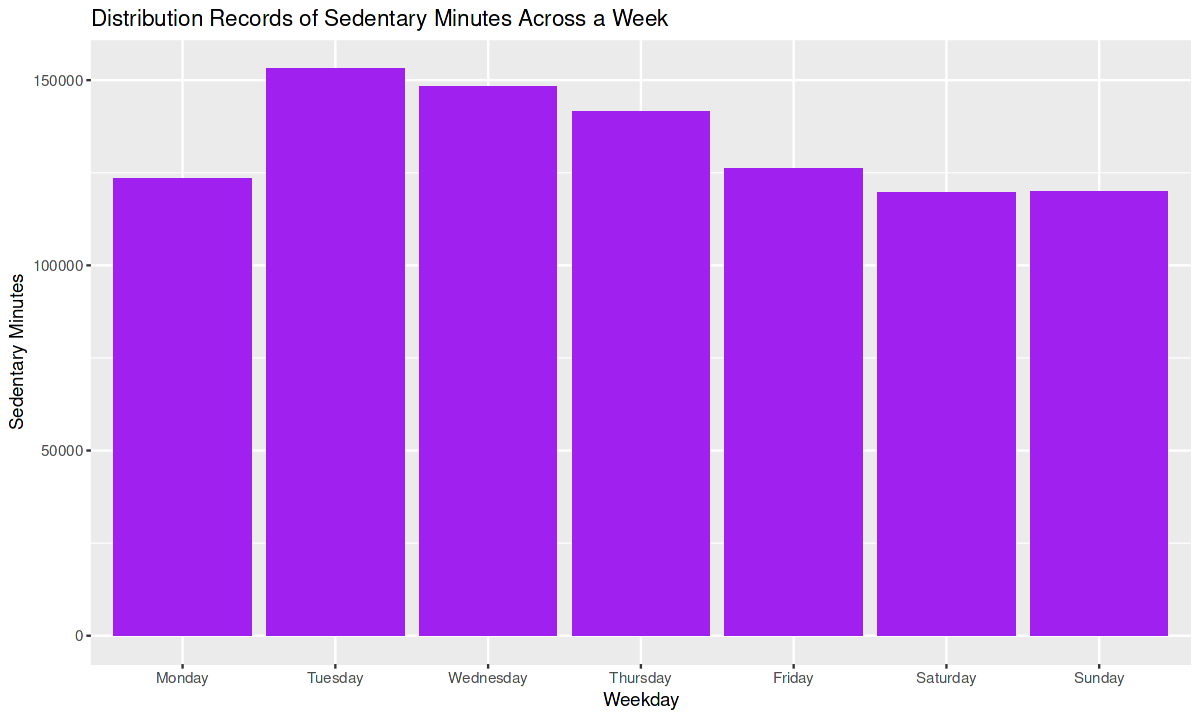

In [60]:
# Create the bar chart
# Set the order of the weekdays
dailyintensities_new$Weekday <- factor(dailyintensities_new$Weekday,
                                       levels = c("Monday", "Tuesday", "Wednesday", 
                                                  "Thursday", "Friday", "Saturday", "Sunday"))
# Set the plot width and height
options(repr.plot.width = 10, repr.plot.height = 6)  # Set the output plot to be wider

ggplot(data = dailyintensities_new, aes(x = Weekday, y = sedentaryminutes)) +
  geom_bar(stat = "identity", fill = "purple") + # Use stat="identity" for actual values
 # geom_text(aes(label = sedentaryminutes), 
 #           vjust = -0.5,        # Position text above the bar
 #           color = "black",
 #           size = 4) +
  labs(title = "Distribution Records of Sedentary Minutes Across a Week", 
       x = "Weekday", 
       y = "Sedentary Minutes") # +
  #theme_minimal() + # Optional: A minimal theme for better appearance
  # theme(text = element_text(size = 12, family = "Arial"))  # Customize text appearance


#### 2.4.4.1 Insights From Distribution of Weekly Sedentary Minutes
- The bar chart displaying the distribution of sedentary minutes across the week shows that participants logged the **most sedentary minutes on Tuesday**, with **Wednesday** coming in a close second.


### 2.4.5 Weekly Steps Count Distribution 

In [61]:
# Investigate the steps count distribution of users within a weekday.
dailysteps_new <- dailysteps_new %>% 
    mutate( Weekday = weekdays(as.Date(activitydate, "%Y/%m/%d")))

# Preview the daily_activity dataframe after adding weekday column.
head(dailysteps_new)
# Now the day of the week shown in the last column.

id         activitydate steptotal Weekday  
1 1503960366 2016-04-12   13162     Tuesday  
2 1503960366 2016-04-13   10735     Wednesday
3 1503960366 2016-04-14   10460     Thursday 
4 1503960366 2016-04-15    9762     Friday   
5 1503960366 2016-04-16   12669     Saturday 
6 1503960366 2016-04-17    9705     Sunday

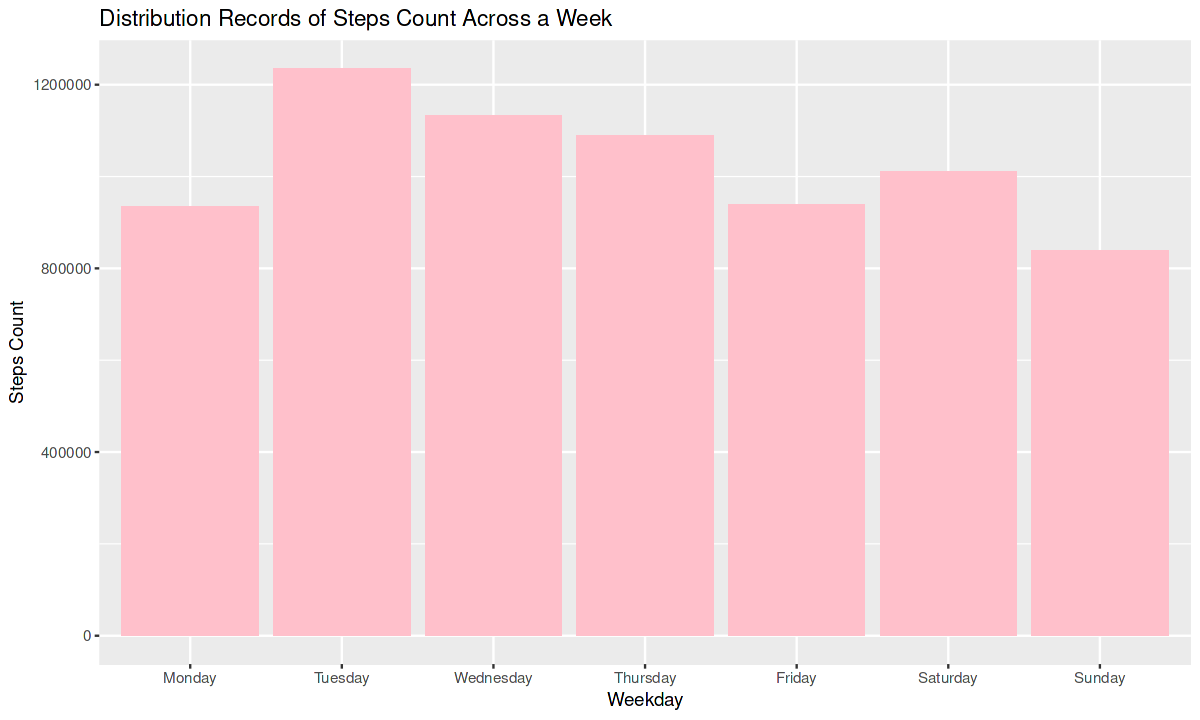

In [62]:
# Create the bar chart
# Convert the Weekday column to a factor with specified order
dailysteps_new$Weekday <- factor(dailysteps_new$Weekday,
                                 levels = c("Monday", "Tuesday", "Wednesday", 
                                            "Thursday", "Friday", "Saturday", "Sunday"))
# Set the plot width and height
options(repr.plot.width = 10, repr.plot.height = 6)  # Set the output plot to be wider

ggplot(data = dailysteps_new, aes(x = Weekday, y = steptotal)) +
  geom_bar(stat = "identity", fill = "pink") +  # Use stat="identity" for actual values
  labs(title = "Distribution Records of Steps Count Across a Week", 
       x = "Weekday", 
       y = "Steps Count") # +
 # theme_minimal()  # Optional: A minimal theme for better appearance


#### 2.4.5.1 Insights From Weekly Steps Count Distribution
- The bar chart illustrating the distribution of step counts throughout the week indicates that participants recorded the **highest number of steps on Tuesday**, followed closely by **Wednesday**.
- We found that **Tuesday and Wednesday had the highest step counts but also the longest sedentary minutes**. This could be due to structured work schedules combining movement with prolonged sitting, specific exercise habits, social activities that involve walking but lead to more sitting, and busy routines. Further examination of participants' activities and time-use patterns on these days could provide additional insights.


### 2.4.6 Hourly Steps Count Distribution

In [63]:
# Get insight on users hourly steps
# Import Datasets 
hourly_steps <- read.csv("/kaggle/input/bellabeat-dataset-2/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

# Examine Dataset, Check NA Values, Check Duplications
# Hourly Steps Dataset
dim_hourlysteps <- dim(hourly_steps)
output_dimhourlysteps <- paste("Dimensions of hourly_steps:", dim_hourlysteps[1], "row and", dim_hourlysteps[2], "columns.")
print(output_dimhourlysteps)

missing_hourlysteps <- sum(is.na(hourly_steps))
output_mishourlysteps <- paste("Number of missing value:", missing_hourlysteps)
print(output_mishourlysteps)

duplicated_hourlysteps <- sum(duplicated(hourly_steps))
output_duphourlysteps <- paste("Number of duplicated rows:", duplicated_hourlysteps)
print(output_duphourlysteps)

# Correct column name
hourly_steps_renamed <- hourly_steps %>%
    setNames(tolower(names(.))) %>%
    rename(activitydate = activityhour)
# Add an empty line
cat("\n")


# Convert "activitydate" to date-time format and store in a new dataframe
hourlysteps_new <- hourly_steps_renamed
hourlysteps_new$activitydate <- as.POSIXct(hourlysteps_new$activitydate, 
                                           format = "%m/%d/%Y %I:%M:%S %p")

# Check the structure of the new dataframe
str(hourlysteps_new)
head(hourlysteps_new)

[1] "Dimensions of hourly_steps: 22099 row and 3 columns."
[1] "Number of missing value: 0"
[1] "Number of duplicated rows: 0"

'data.frame':	22099 obs. of  3 variables:
 $ id          : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ activitydate: POSIXct, format: "2016-04-12 00:00:00" "2016-04-12 01:00:00" ...
 $ steptotal   : int  373 160 151 0 0 0 0 0 250 1864 ...


id         activitydate        steptotal
1 1503960366 2016-04-12 00:00:00 373      
2 1503960366 2016-04-12 01:00:00 160      
3 1503960366 2016-04-12 02:00:00 151      
4 1503960366 2016-04-12 03:00:00   0      
5 1503960366 2016-04-12 04:00:00   0      
6 1503960366 2016-04-12 05:00:00   0

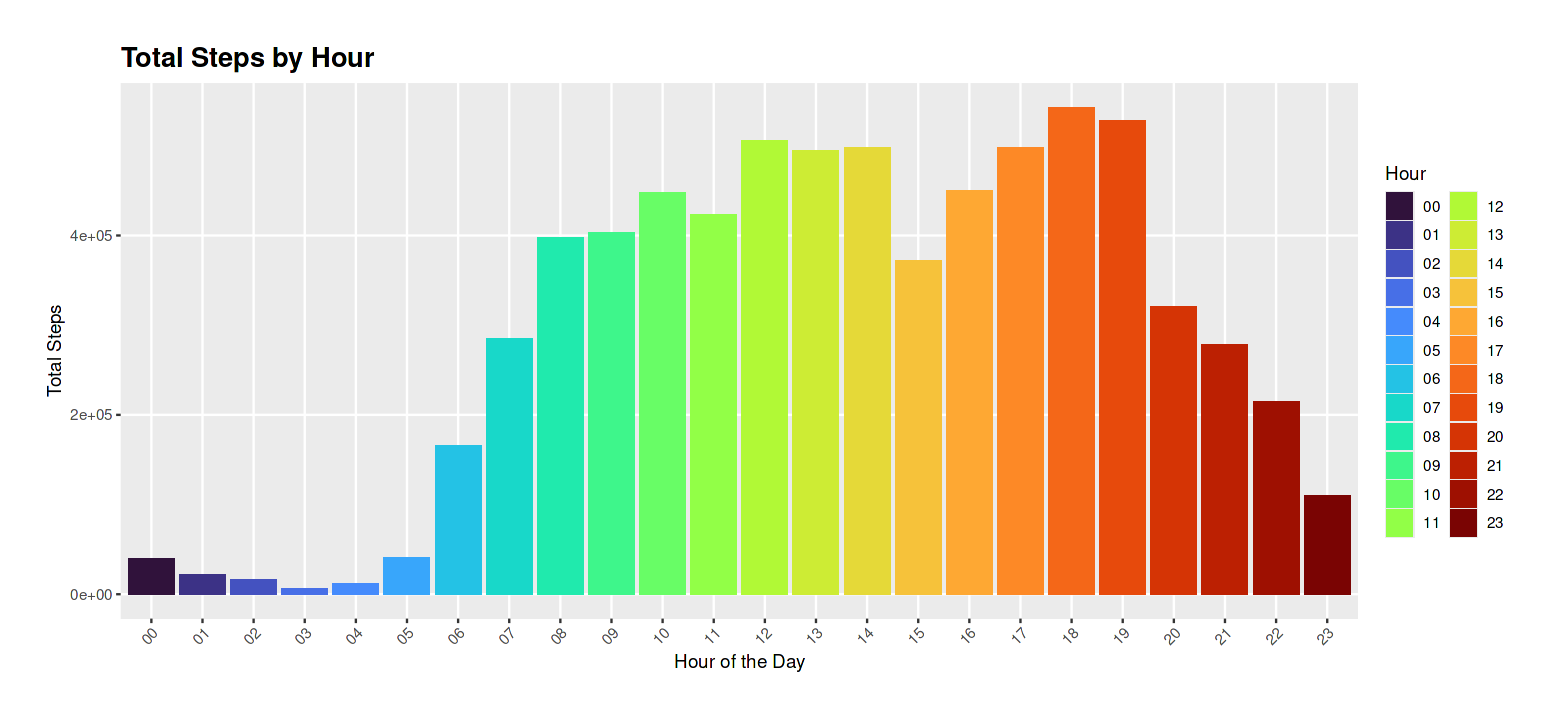

In [64]:
library(viridis)  # For viridis color scales

# Extract hour from the "activitydate" column
hourlysteps_new <- hourlysteps_new %>%
  mutate(hour = format(activitydate, "%H"))  # Extract the hour

# Summarize the total steps by hour
hourly_steps_summary <- hourlysteps_new %>%
  group_by(hour) %>%
  summarise(total_steps = sum(steptotal, na.rm = TRUE))

# Set the plot width and height
options(repr.plot.width = 13, repr.plot.height = 6)  # Set the output plot to be wider

# Plot the bar chart with individual colors for each hour and a legend
ggplot(hourly_steps_summary, aes(x = hour, y = total_steps, fill = hour)) +
  geom_bar(stat = "identity") +   # Fill color based on the hour
  scale_fill_viridis_d(option = "turbo") +  
  labs(title = "Total Steps by Hour", x = "Hour of the Day", y = "Total Steps", fill = "Hour") +
#  theme_minimal() +
  theme(legend.position = "right")  + # Position the legend to the right
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.margin = unit(c(1,1,1,1), "cm"),
    panel.grid.minor = element_blank()
  ) 

#  coord_fixed(ratio = 0.05)  # Adjust the ratio to make the plot wider

#### 2.4.6.1 Insights From Hourly Steps Count Distribution
- The bar chart depicting total steps by hour reveals that participants are **most active between 12pm and 2pm, as well as from 5pm to 7pm**. This increased activity and more steps taken can be attributed to lunch breaks and after-work hours. 

### 2.4.7 Formulating Hypotheses and Analyzing Results through Visualization
- Assumption 1 : The total steps taken show a positive correlation with calories burned.
- Assumption 2 : The total steps taken appear to be positively associated with higher active minutes.
- Assumption 3 : Total sedentary minutes are negatively associated with the number of calories burned.
- Assumption 4 : There is a negative association between total sleep minutes and calories burned.
- Assumption 5 : Sedentary minutes are positively associated with BMI.

#### 2.4.7.1 Assumption 1 : Total Steps vs Calories Burned

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


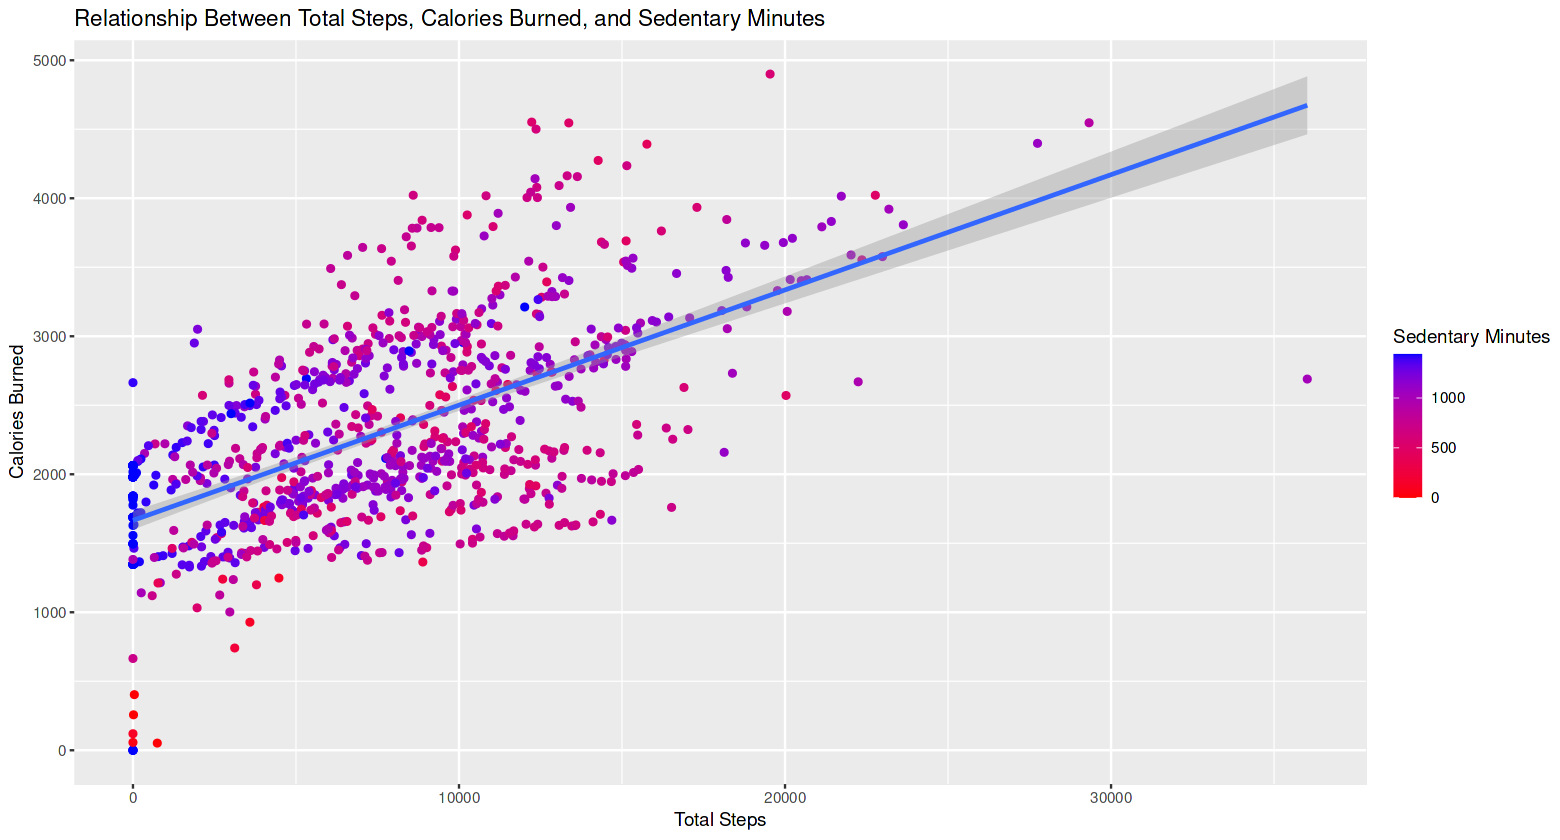

In [65]:
# Set the plot width and height
options(repr.plot.width = 13, repr.plot.height = 7)  # Set the output plot to be wider

ggplot(data = dailyactivity_new, aes(x = totalsteps, y = calories, color = sedentaryminutes)) +
  geom_point() + 
  geom_smooth(method = "lm") +
  scale_color_gradient(low = "red", high = "blue") +  
  labs(
    title = "Relationship Between Total Steps, Calories Burned, and Sedentary Minutes",
    x = "Total Steps",
    y = "Calories Burned",
    color = "Sedentary Minutes"
  ) #+
#  theme_minimal()



***Findings From Total Steps vs Calories Burned***
- We assumed that increased activity typically leads to more steps taken and greater calories burned. Yet, the data presents intriguing insights. Some sedentary users who take minimal steps can still burn between 1,500 and 2,500 calories, which is similar to the calorie expenditure of more active users who take significantly more steps.

#### 2.4.7.2 Assumption 2 : Total Steps vs Active Minutes

`geom_smooth()` using formula = 'y ~ x'


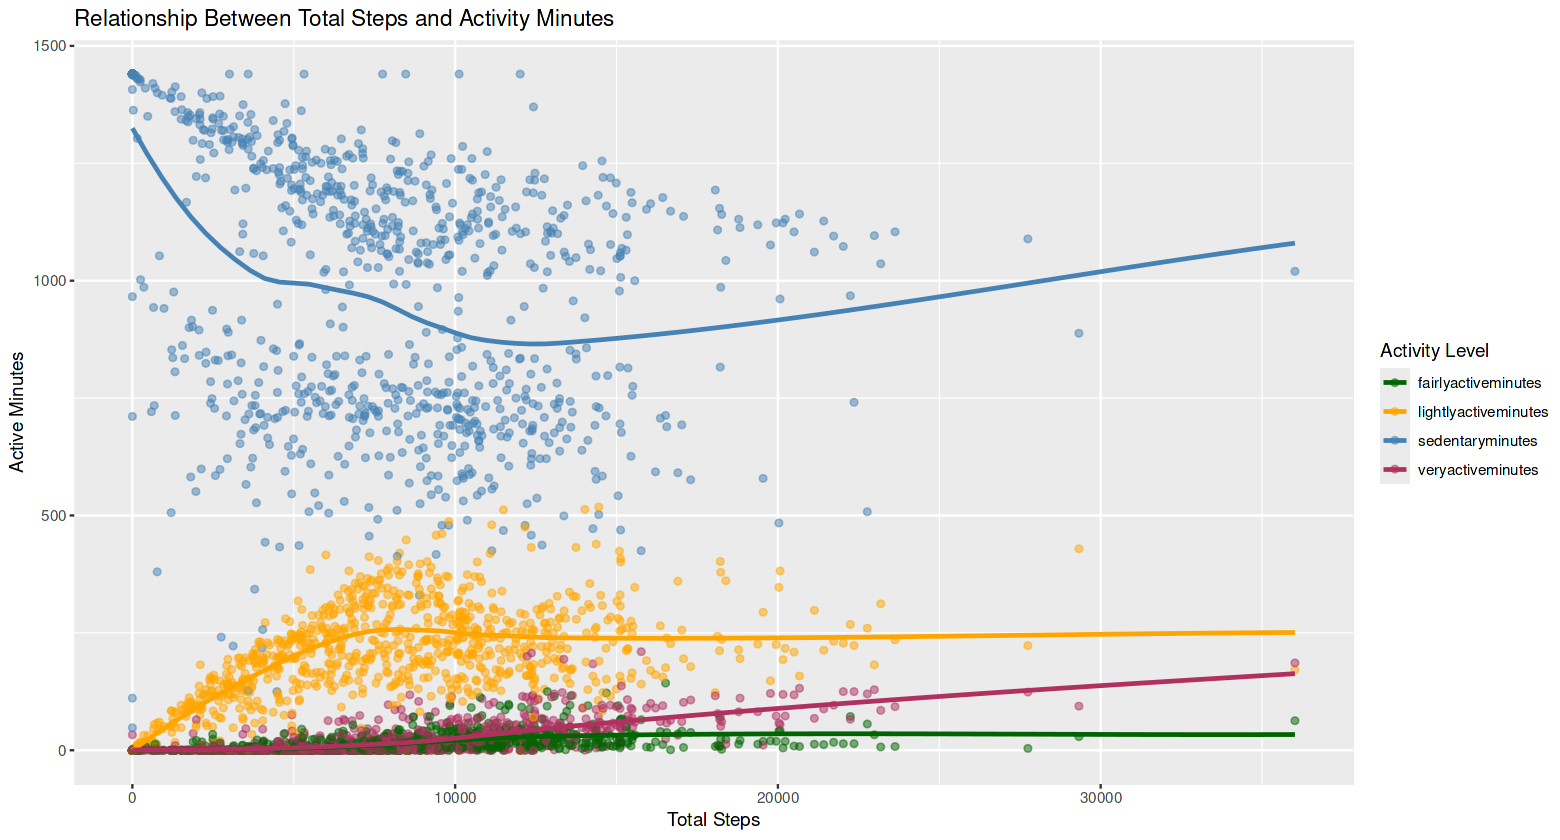

In [66]:
# Set the plot width and height
options(repr.plot.width = 13, repr.plot.height = 7)  # Set the output plot to be wider


# Reshape the data to long format
long_data <- dailyactivity_new %>%
  pivot_longer(
    cols = c(sedentaryminutes, lightlyactiveminutes, fairlyactiveminutes, veryactiveminutes),
    names_to = "activity_level",
    values_to = "minutes"
  )

# Create the geom_smooth plot
ggplot(data = long_data, aes(x = totalsteps, y = minutes, color = activity_level)) +
  geom_point(alpha = 0.5) +  # Add points for each observation
  geom_smooth(method = "loess", se = FALSE) +  # Smooth line without confidence interval
  labs(
    title = "Relationship Between Total Steps and Activity Minutes",
    x = "Total Steps",
    y = "Active Minutes",
    color = "Activity Level"
  ) +
  scale_color_manual(
    values = c(
      "sedentaryminutes" = "steelblue",          # Color for sedentary minutes
      "lightlyactiveminutes" = "orange",     # Color for lightly active minutes
      "fairlyactiveminutes" = "darkgreen",       # Color for fairly active minutes
      "veryactiveminutes" = "maroon"))           # Color for very active minutes
#+
#  theme_minimal()  # Optional: Apply a clean theme


***Findings From Total Steps vs Active Minutes***
- When comparing the four activity levels with total steps, the data reveals that most users take between 5,000 and 15,000 steps per day. On average, these users spend 8 to 13 hours being sedentary, around 5 hours in light activity, and 1 to 2 hours in moderate to vigorous activity.

#### 2.4.7.3 Assumption 3 : Calories Burned vs Active Minutes

`geom_smooth()` using formula = 'y ~ x'


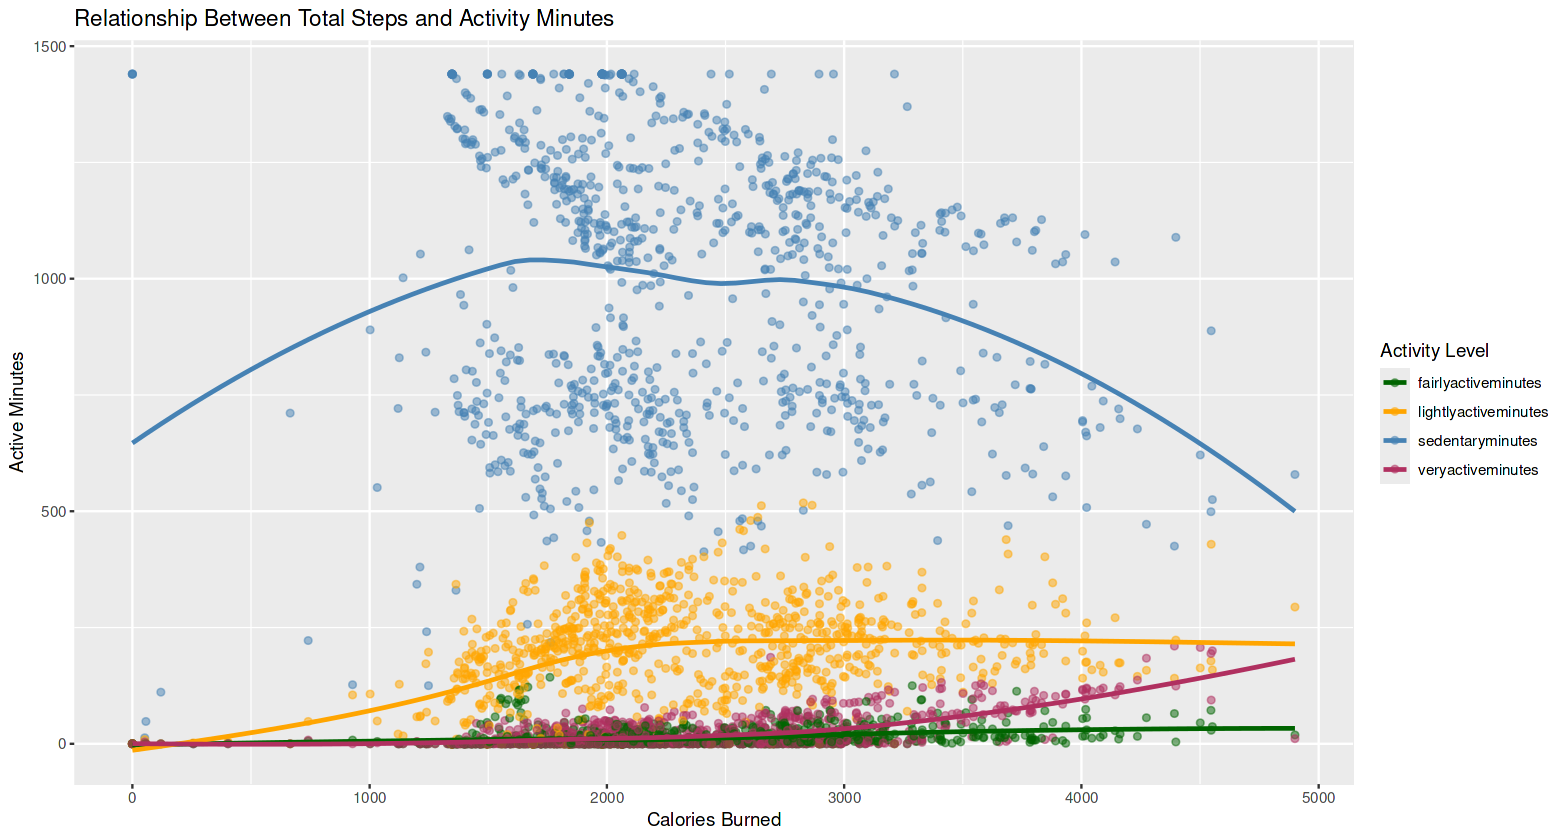

In [67]:
# Set the plot width and height
options(repr.plot.width = 13, repr.plot.height = 7)  # Set the output plot to be wider


# Create the geom_smooth plot
ggplot(data = long_data, aes(x = calories, y = minutes, color = activity_level)) +
  geom_point(alpha = 0.5) +  # Add points for each observation
  geom_smooth(method = "loess", se = FALSE) +  # Smooth line without confidence interval
  labs(
    title = "Relationship Between Total Steps and Activity Minutes",
    x = "Calories Burned",
    y = "Active Minutes",
    color = "Activity Level"
  ) +
  scale_color_manual(
    values = c(
      "sedentaryminutes" = "steelblue",          # Color for sedentary minutes
      "lightlyactiveminutes" = "orange",     # Color for lightly active minutes
      "fairlyactiveminutes" = "darkgreen",       # Color for fairly active minutes
      "veryactiveminutes" = "maroon"))           # Color for very active minutes

#+
#  theme_minimal()  # Optional: Apply a clean theme


***Findings From Calories Burned vs Active Minutes***
- The CDC provides general daily calorie intake recommendations based on age, sex, and activity level. For women, the range is 1,600–2,400 calories, while for men, it's 2,000–3,000 calories. Sedentary individuals require fewer calories, while active individuals need more to sustain their energy levels.
- When comparing the four activity levels to calorie expenditure, most data clusters around users burning 2,000 to 3,000 calories per day. Notably, the sedentary trend flattens towards the higher end, while the fairly and very active trend curves upwards. This suggests that users who burn more calories tend to spend less time being sedentary and more time engaging in fairly to very active pursuits.

#### 2.4.7.4 Assumption 4 : Total Minutes Asleep vs Calories

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 971 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“Removed 971 rows containing missing values or values outside the scale range
(`geom_point()`).”


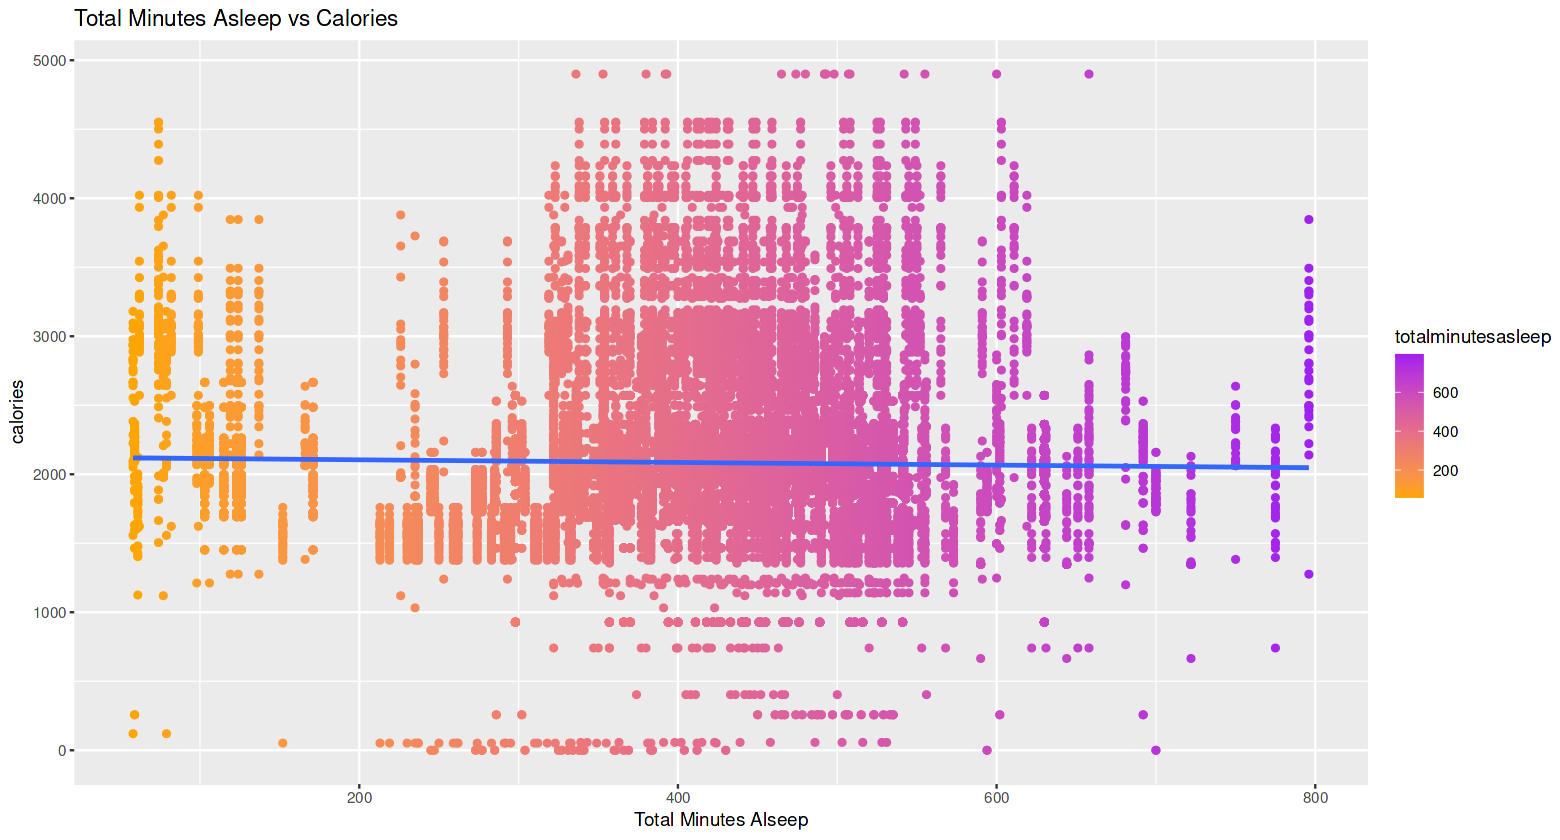

In [68]:
# Plot chart for total minutes asleep vs calories
ggplot(data=merged_data, aes(x=totalminutesasleep, y = calories, color=totalminutesasleep))+ 
  geom_point()+ 
  labs(title="Total Minutes Asleep vs Calories")+
  xlab("Total Minutes Alseep")+
  stat_smooth(method=lm)+
  scale_color_gradient(low="orange", high="purple")

***Findings From Total Minutes Asleep vs Calories***
- The data visualization shows no clear positive or negative correlation between total sleep minutes and calories burned. Therefore, getting more sleep doesn't appear to influence the number of calories burned.

#### 2.4.7.5 Assumption 5 : Correlation Between BMI and Sedentary Minutes

id         activitydate weightkg weightpounds fat bmi   ismanualreport
1 1503960366 2016-05-02    52.6    115.9631     22  22.65 True          
2 1503960366 2016-05-03    52.6    115.9631     NA  22.65 True          
3 1927972279 2016-04-13   133.5    294.3171     NA  47.54 False         
4 2873212765 2016-04-21    56.7    125.0021     NA  21.45 True          
5 2873212765 2016-05-12    57.3    126.3249     NA  21.69 True          
6 4319703577 2016-04-17    72.4    159.6147     25  27.45 True          
  logid        totalsteps totaldistance ⋯ veryactivedistance
1 1.462234e+12 14727      9.71          ⋯ 3.21              
2 1.462320e+12 15103      9.66          ⋯ 3.73              
3 1.460510e+12   356      0.25          ⋯ 0.00              
4 1.461283e+12  8859      5.98          ⋯ 0.13              
5 1.463098e+12  7566      5.11          ⋯ 0.00              
6 1.460938e+12    29      0.02          ⋯ 0.00              
  moderatelyactivedistance lightactivedistance sedentaryactivedistance
1 0.57                     5.92                0.00                   
2 1.05                     4.88                0.00                   
3 0.00                     0.25                0.00                   
4 0.37                     5.47                0.01                   
5 0.00                     5.11                0.00                   
6 0.00                     0.02                0.00                   
  veryactiveminutes fairlyactiveminutes lightlyactiveminutes sedentaryminutes
1 41                15                  277                   798            
2 50                24                  254                   816            
3  0                 0                   32                   986            
4  2                10                  371                  1057            
5  0                 0                  268                   720            
6  0                 0                    3                  1363            
  calories Weekday  
1 2004     Monday   
2 1990     Tuesday  
3 2151     Wednesday
4 1970     Thursday 
5 1431     Thursday 
6 1464     Sunday

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


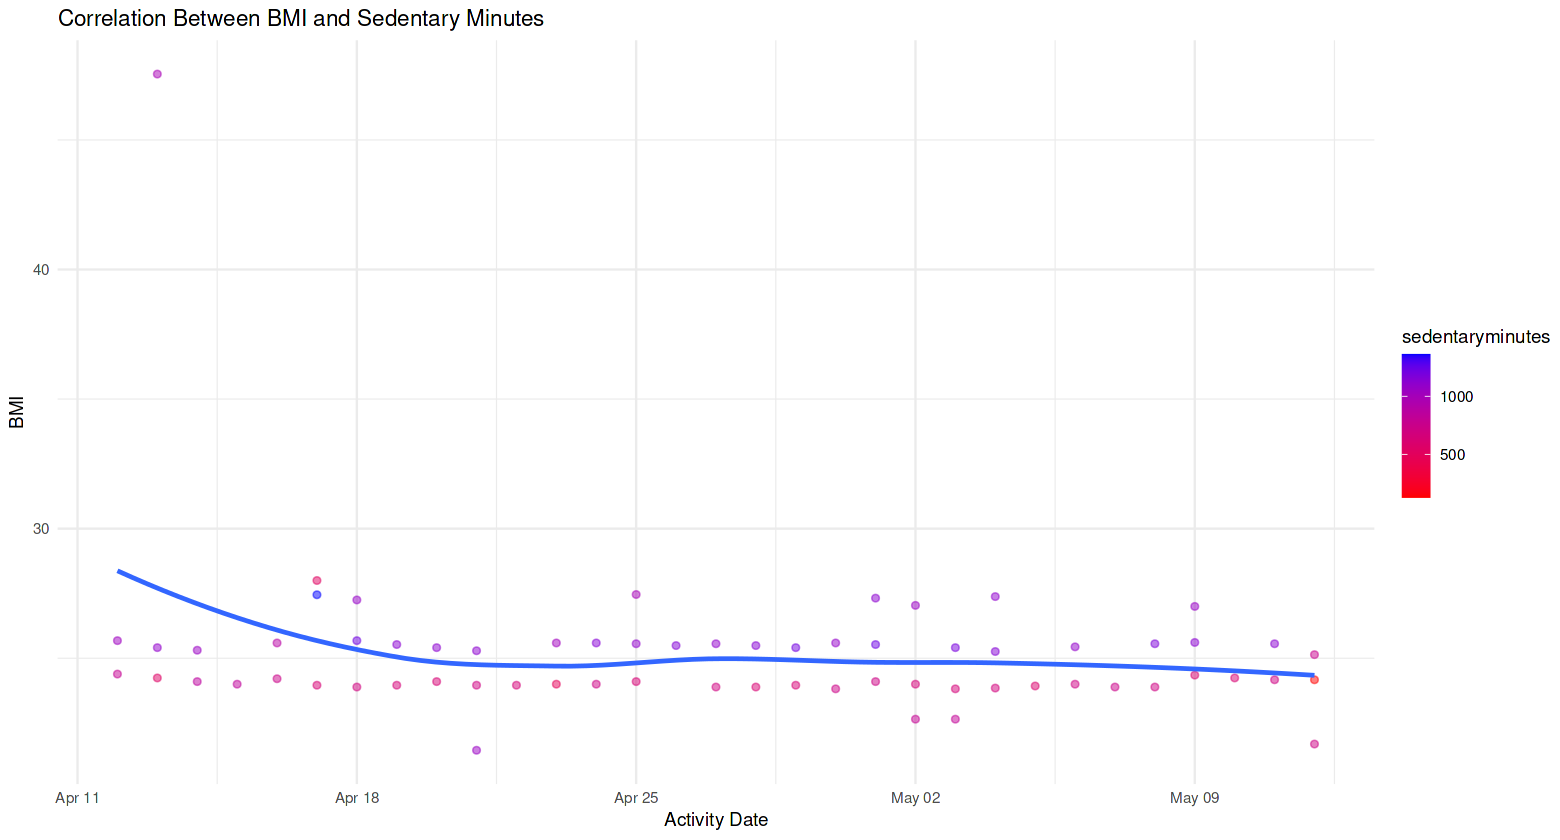

In [69]:
# Plot chart for sedentary minutes vs bmi
merged_data2 <- merge(weightlog_new, dailyactivity_new, group_by=c('id', 'activitydate'))
head(merged_data2)

# Set the plot width and height
options(repr.plot.width = 13, repr.plot.height = 7)  # Set the output plot to be wider

# Plot geom_smooth for bmi vs sedentary minutes
ggplot(data = merged_data2, aes(x = activitydate, y = bmi, color=sedentaryminutes)) +
  geom_point(alpha = 0.5) +  # Add points for each observation with some transparency
  geom_smooth(method = "loess", se = FALSE) + # Add smooth line without confidence interval
  scale_color_gradient(low = "red", high = "blue") +
  labs(
    title = "Correlation Between BMI and Sedentary Minutes",
    x = "Activity Date",
    y = "BMI"
  ) +
  theme_minimal()  # Optional: Apply a minimal theme for better appearance

***Findings From Correlation Between BMI and Sedentary Minutes***
- The CDC uses Body Mass Index (BMI) as a quick and affordable way to categorize weight based on height. For adults, BMI is divided into categories: underweight (below 18.5), healthy weight (18.5–24.9), overweight (25–29.9), and obesity (30+).
- The data visualization indicates a positive correlation between total sedentary minutes and BMI, suggesting that higher BMI levels among participants are largely associated with prolonged sedentary behavior. Reducing sedentary time is therefore crucial in helping maintain a healthier BMI and overall well-being.

## 2.5 Step 5: Share
- Presenting visual insights from the analysis findings.

***Bellabeat Data Analysis Dashboard [Click Here](https://public.tableau.com/views/CaseStudyBellabeat_17285506148730/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)***

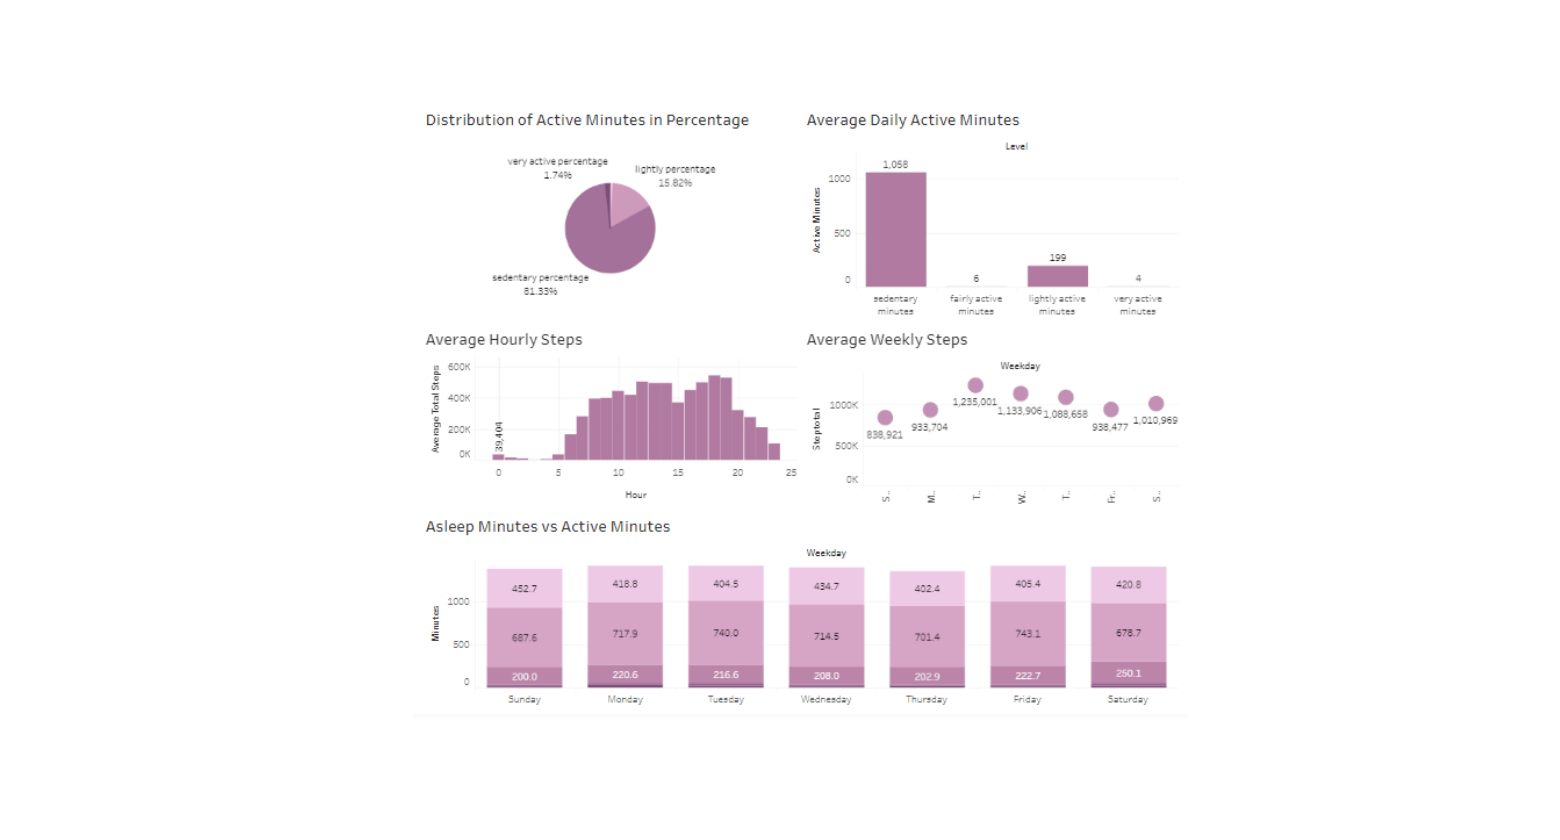

In [70]:
# Use the magick package to read and display the image
library(magick)

img <- image_read("/kaggle/input/bellabeatdashboard/dashboard_picture.PNG")
plot(img)


## 2.6 Step 6: Act
- Define conclusion and provide recommendations.

### 2.6.1 Conclusion and Recommendations
- Lacking information about the participants' age and gender may introduce bias into this summary. It is advisable to have a larger sample size with complete records for a more thorough analysis.
- Our participants predominantly fall into a category of low health status, commonly characterized by issues such as insomnia, prolonged sedentary behavior, and obesity.sers
- To ensure a more accurate analysis, it's important to gather additional data by encouraging users to use WiFi connected scales instead of manually entering their weight. It is strongly advocate for automating all reporting methods. This change would streamline the app’s features, offering users a more seamless experience while reducing confusion.
- Based on the available dataset, some data overlaps within datasets. Merging these overlapping features into one dataset is highly recommended to enhance health monitoring for users and improve the app's usability, ultimately boosting user engagem
- The campaign can be enhanced with a points-based incentive system, where users who complete weekly exercise goals or participate in specific challenges will earn Bellabeat points, redeemable for products or membership rewards.
- Bellabeat health trackers could incorporate a vibration reminder after extended periods of inactivity, prompting users to move. Additionally, it could notify users when it’s time to sleep after detecting prolonged wakefulness in bed.ent.

# 3.0 Saving Files for Dashboard
- Saving necessary files for further use in dashboard presentation.

In [71]:
merged_sleepday <- merge(sleepday_new, dailyintensities_new, by = c("id", "Weekday", "activitydate"), all=TRUE)

# Remove NA value in dataframe
merged_sleepday_clean <- na.omit(merged_sleepday)

# Check the result
head(merged_sleepday_clean)


id         Weekday activitydate totalsleeprecords totalminutesasleep
2 1503960366 Monday  2016-04-25   1                 277               
3 1503960366 Monday  2016-05-02   1                 277               
4 1503960366 Monday  2016-05-09   1                 338               
5 1503960366 Tuesday 2016-04-12   1                 327               
6 1503960366 Tuesday 2016-04-19   1                 304               
7 1503960366 Tuesday 2016-04-26   1                 245               
  totaltimeinbed sedentaryminutes lightlyactiveminutes fairlyactiveminutes
2 323            814              216                  14                 
3 309            798              277                  15                 
4 342            835              206                  11                 
5 346            728              328                  13                 
6 320            775              264                  31                 
7 274            833              279                  23                 
  veryactiveminutes sedentaryactivedistance lightactivedistance
2 73                0                       3.94               
3 41                0                       5.92               
4 46                0                       3.74               
5 25                0                       6.06               
6 50                0                       5.03               
7 31                0                       5.54               
  moderatelyactivedistance veryactivedistance
2 0.57                     5.29              
3 0.57                     3.21              
4 0.53                     3.45              
5 0.55                     1.88              
6 1.32                     3.53              
7 0.92                     2.33

In [72]:
# Saving the CSV file in the working directory
write.csv(merged_data, file = '/kaggle/working/merged_data.csv', row.names = FALSE)
write.csv(percentage, file='/kaggle/working/percentage.csv', row.names = FALSE)
write.csv(hourly_steps_summary, file='/kaggle/working/hourlystepssummary.csv', row.names = FALSE)
write.csv(dailysteps_new, file='/kaggle/working/dailysteps.csv', row.names = FALSE)
write.csv(sleepday_new, file='/kaggle/working/sleepday.csv', row.names = FALSE)
write.csv(merged_sleepday_clean, file='/kaggle/working/merged_sleepday_clean.csv', row.names = FALSE)

# 4.0 References
- US Centers of Disease Control and Prevention : [Access Link to CDC.gov](https://www.cdc.gov/healthy-weight-growth/about/tips-for-balancing-food-activity.html)
- Information search from Stack Overflow : [Access Link to Stack Overflow](https://stackoverflow.com/)
- Information search from Github : [Access Link to Github](https://github.com/)